In [8]:
# ============================================================
#  INTEGRATION EXPLORER — Dummy Data Version (Task 4)
#  Naqsha-e-Safar
#  Purpose:
#     - Explore how Speedo routes (#2) and PMA stops (#3)
#       will integrate with metro_routes (dataset #1)
#     - Build unified geodataframes
#     - Cross-reference stops & routes
#     - Prototype spatial joins and route graph
# ============================================================

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import json

# ------------------------------------
# 1. LOAD DUMMY SPEEDO ROUTES (GeoJSON)
# ------------------------------------

dummy_speedo = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "route_id": "B1",
                "route_name": "General Bus Stand → Airport",
                "service_type": "Speedo Bus",
                "operator": "PMA-Daewoo",
                "color": "#FF6B35",
                "stops": ["General Bus Stand", "Model Town", "Airport"],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.3436, 31.5204],
                    [74.3586, 31.5304],
                    [74.4036, 31.5210],
                ],
            },
        },
        {
            "type": "Feature",
            "properties": {
                "route_id": "B2",
                "route_name": "Ravi Road → Thokar Niaz Baig",
                "service_type": "Speedo Bus",
                "operator": "PMA-Daewoo",
                "color": "#FD9644",
                "stops": ["Ravi Road", "Chauburji", "Thokar Niaz Baig"],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.3001, 31.5901],
                    [74.3166, 31.5550],
                    [74.2211, 31.4942],
                ],
            },
        },
        {
            "type": "Feature",
            "properties": {
                "route_id": "B3",
                "route_name": "Shahdara → Kalma Chowk",
                "service_type": "Speedo Bus",
                "operator": "PMA-Daewoo",
                "color": "#C44536",
                "stops": ["Shahdara", "Railway Station", "Kalma Chowk"],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.2910, 31.6203],
                    [74.3560, 31.5660],
                    [74.3480, 31.5080],
                ],
            },
        },
        {
            "type": "Feature",
            "properties": {
                "route_id": "F1",
                "route_name": "Multan Chungi → Ichhra",
                "service_type": "Feeder Bus",
                "operator": "PMA-Daewoo",
                "color": "#4ECDC4",
                "stops": ["Multan Chungi", "Qainchi", "Ichhra"],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.3180, 31.4640],
                    [74.3060, 31.5100],
                    [74.3300, 31.5450],
                ],
            },
        },
        {
            "type": "Feature",
            "properties": {
                "route_id": "F2",
                "route_name": "Kot Lakhpat → Muslim Town",
                "service_type": "Feeder Bus",
                "operator": "PMA-Daewoo",
                "color": "#45B7D1",
                "stops": ["Kot Lakhpat", "Model Town Park", "Muslim Town"],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.3260, 31.4730],
                    [74.3430, 31.4960],
                    [74.3510, 31.5320],
                ],
            },
        },
        {
            "type": "Feature",
            "properties": {
                "route_id": "F3",
                "route_name": "Bhati Gate → Circular Road → Metro",
                "service_type": "Feeder Bus",
                "operator": "PMA-Daewoo",
                "color": "#9AECDB",
                "stops": ["Bhati Gate", "Circular Road", "Metro Station"],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.3136, 31.5804],
                    [74.3236, 31.5754],
                    [74.3336, 31.5704],
                ],
            },
        },
        {
            "type": "Feature",
            "properties": {
                "route_id": "F4",
                "route_name": "Johar Town → Expo Center → Canal",
                "service_type": "Feeder Bus",
                "operator": "PMA-Daewoo",
                "color": "#26A69A",
                "stops": ["Johar Town", "Expo Center", "Canal Station"],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.2750, 31.4700],
                    [74.2670, 31.5040],
                    [74.3000, 31.5200],
                ],
            },
        },
        {
            "type": "Feature",
            "properties": {
                "route_id": "F5",
                "route_name": "Green Town → Township → Model Town",
                "service_type": "Feeder Bus",
                "operator": "PMA-Daewoo",
                "color": "#2E86DE",
                "stops": ["Green Town", "Township", "Model Town"],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.2760, 31.4500],
                    [74.2910, 31.4720],
                    [74.3190, 31.5020],
                ],
            },
        },
        {
            "type": "Feature",
            "properties": {
                "route_id": "C1",
                "route_name": "Ring Road Circular",
                "service_type": "City Circular",
                "operator": "PMA",
                "color": "#F6B93B",
                "stops": [
                    "Ring Road North",
                    "Ring Road East",
                    "Ring Road South",
                    "Ring Road West",
                ],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.4000, 31.6000],
                    [74.4500, 31.5400],
                    [74.3800, 31.4700],
                    [74.3100, 31.5600],
                    [74.4000, 31.6000],
                ],
            },
        },
        {
            "type": "Feature",
            "properties": {
                "route_id": "C2",
                "route_name": "Inner City Loop",
                "service_type": "City Circular",
                "operator": "PMA",
                "color": "#E58E26",
                "stops": ["Mall Road", "Lower Mall", "Ferozepur Road", "Chauburji"],
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [74.3430, 31.5600],
                    [74.3500, 31.5480],
                    [74.3300, 31.5200],
                    [74.3200, 31.5550],
                    [74.3430, 31.5600],
                ],
            },
        },
    ],
}

speedo_gdf = gpd.GeoDataFrame.from_features(dummy_speedo["features"], crs="EPSG:4326")
speedo_gdf.head()

,geometry,route_id,route_name,service_type,operator,color,stops
0,"LINESTRING (74.3436 31.5204, 74.3586 31.5304, ...",B1,General Bus Stand → Airport,Speedo Bus,PMA-Daewoo,#FF6B35,"[General Bus Stand, Model Town, Airport]"
1,"LINESTRING (74.3001 31.5901, 74.3166 31.555, 7...",B2,Ravi Road → Thokar Niaz Baig,Speedo Bus,PMA-Daewoo,#FD9644,"[Ravi Road, Chauburji, Thokar Niaz Baig]"
2,"LINESTRING (74.291 31.6203, 74.356 31.566, 74....",B3,Shahdara → Kalma Chowk,Speedo Bus,PMA-Daewoo,#C44536,"[Shahdara, Railway Station, Kalma Chowk]"
3,"LINESTRING (74.318 31.464, 74.306 31.51, 74.33...",F1,Multan Chungi → Ichhra,Feeder Bus,PMA-Daewoo,#4ECDC4,"[Multan Chungi, Qainchi, Ichhra]"
4,"LINESTRING (74.326 31.473, 74.343 31.496, 74.3...",F2,Kot Lakhpat → Muslim Town,Feeder Bus,PMA-Daewoo,#45B7D1,"[Kot Lakhpat, Model Town Park, Muslim Town]"


In [9]:
# ------------------------------------
# 2. LOAD DUMMY PMA STOPS (GeoJSON)
# ------------------------------------

dummy_stops = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_001",
                "name": "General Bus Stand",
                "type": "terminal",
                "routes": ["B1", "B2", "F3"],
                "operator": "PMA",
                "amenities": ["shelter", "bench"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3436, 31.5204]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_002",
                "name": "Model Town",
                "type": "bus_stop",
                "routes": ["B1", "F5"],
                "operator": "PMA",
                "amenities": ["shelter"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3586, 31.5304]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_003",
                "name": "Airport Station",
                "type": "terminal",
                "routes": ["B1"],
                "operator": "PMA",
                "amenities": ["shelter", "bench", "lighting"],
            },
            "geometry": {"type": "Point", "coordinates": [74.4036, 31.5210]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_004",
                "name": "Ravi Road",
                "type": "bus_stop",
                "routes": ["B2"],
                "operator": "PMA",
                "amenities": ["shelter"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3001, 31.5901]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_005",
                "name": "Chauburji",
                "type": "interchange",
                "routes": ["B2", "C2"],
                "operator": "PMA",
                "amenities": ["bench", "lighting"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3166, 31.5550]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_006",
                "name": "Thokar Niaz Baig",
                "type": "bus_stop",
                "routes": ["B2"],
                "operator": "PMA",
                "amenities": ["shelter"],
            },
            "geometry": {"type": "Point", "coordinates": [74.2211, 31.4942]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_007",
                "name": "Shahdara",
                "type": "terminal",
                "routes": ["B3"],
                "operator": "PMA",
                "amenities": ["bench"],
            },
            "geometry": {"type": "Point", "coordinates": [74.2910, 31.6203]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_008",
                "name": "Railway Station",
                "type": "interchange",
                "routes": ["B3", "C2"],
                "operator": "PMA",
                "amenities": ["shelter", "lighting"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3560, 31.5660]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_009",
                "name": "Kalma Chowk",
                "type": "interchange",
                "routes": ["B3", "F1"],
                "operator": "PMA",
                "amenities": ["bench", "lighting"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3480, 31.5080]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_010",
                "name": "Multan Chungi",
                "type": "bus_stop",
                "routes": ["F1"],
                "operator": "PMA",
                "amenities": ["shelter"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3180, 31.4640]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_011",
                "name": "Qainchi",
                "type": "bus_stop",
                "routes": ["F1"],
                "operator": "PMA",
                "amenities": ["shelter", "bench"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3060, 31.5100]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_012",
                "name": "Ichhra",
                "type": "bus_stop",
                "routes": ["F1", "C2"],
                "operator": "PMA",
                "amenities": ["shelter"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3300, 31.5450]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_013",
                "name": "Kot Lakhpat",
                "type": "terminal",
                "routes": ["F2"],
                "operator": "PMA",
                "amenities": ["bench"],
            },
            "geometry": {"type": "Point", "coordinates": [74.3260, 31.4730]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_014",
                "name": "Johar Town",
                "type": "bus_stop",
                "routes": ["F4"],
                "operator": "PMA",
                "amenities": ["shelter"],
            },
            "geometry": {"type": "Point", "coordinates": [74.2750, 31.4700]},
        },
        {
            "type": "Feature",
            "properties": {
                "stop_id": "PMA_015",
                "name": "Township",
                "type": "bus_stop",
                "routes": ["F5"],
                "operator": "PMA",
                "amenities": ["shelter", "bench"],
            },
            "geometry": {"type": "Point", "coordinates": [74.2910, 31.4720]},
        },
    ],
}


stops_gdf = gpd.GeoDataFrame.from_features(dummy_stops["features"], crs="EPSG:4326")
stops_gdf.head()

,geometry,stop_id,name,type,routes,operator,amenities
0,POINT (74.3436 31.5204),PMA_001,General Bus Stand,terminal,"[B1, B2, F3]",PMA,"[shelter, bench]"
1,POINT (74.3586 31.5304),PMA_002,Model Town,bus_stop,"[B1, F5]",PMA,[shelter]
2,POINT (74.4036 31.521),PMA_003,Airport Station,terminal,[B1],PMA,"[shelter, bench, lighting]"
3,POINT (74.3001 31.5901),PMA_004,Ravi Road,bus_stop,[B2],PMA,[shelter]
4,POINT (74.3166 31.555),PMA_005,Chauburji,interchange,"[B2, C2]",PMA,"[bench, lighting]"


In [10]:
# ------------------------------------
# 3. LOAD METRO ROUTES (Existing Repo Data)
# ------------------------------------
# For now, dummy small example metro route
# Replace with actual: gpd.read_file("datasets/lahore_sections.geojson")
# ------------------------------------

metro_dummy = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "metro_id": "M1",
                "line_name": "Lahore Orange Line",
                "color": "#FF0000",
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [[74.30, 31.55], [74.32, 31.57], [74.35, 31.58]],
            },
        }
    ],
}

metro_gdf = gpd.GeoDataFrame.from_features(metro_dummy["features"], crs="EPSG:4326")
metro_gdf.head()

,geometry,metro_id,line_name,color
0,"LINESTRING (74.3 31.55, 74.32 31.57, 74.35 31.58)",M1,Lahore Orange Line,#FF0000


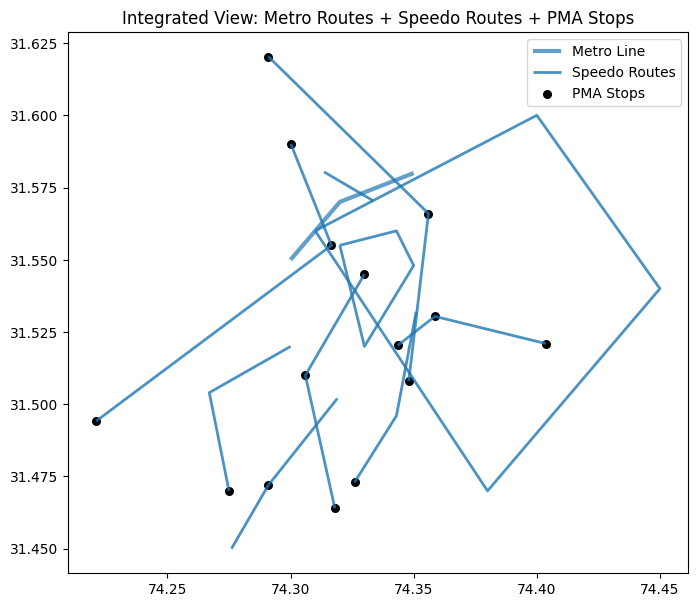

In [11]:
# ------------------------------------
# 4. VISUALIZE ALL LAYERS TOGETHER
# ------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))

metro_gdf.plot(ax=ax, linewidth=3, label="Metro Line", alpha=0.7)
speedo_gdf.plot(ax=ax, linewidth=2, label="Speedo Routes", alpha=0.8)
stops_gdf.plot(ax=ax, color="black", markersize=30, label="PMA Stops")

plt.legend()
plt.title("Integrated View: Metro Routes + Speedo Routes + PMA Stops")
plt.show()

In [5]:
# ------------------------------------
# 5. FIND WHICH STOPS BELONG TO WHICH SPEEDO ROUTES
# ------------------------------------
# For each stop, check distance to each route line
# (Mock version – exact threshold tuning after real data comes)
# ------------------------------------

results = []

for _, stop in stops_gdf.iterrows():
    stop_point = stop.geometry
    matched_routes = []

    for _, route in speedo_gdf.iterrows():
        line = route.geometry
        distance = stop_point.distance(line)

        if distance < 0.002:  # about ~200 m tolerance
            matched_routes.append(route["route_id"])

    results.append(
        {
            "stop_id": stop["stop_id"],
            "stop_name": stop["name"],
            "matched_speedo_routes": matched_routes,
        }
    )

pd.DataFrame(results)

,stop_id,stop_name,matched_speedo_routes
0,PMA_001,General Bus Stand,[B1]
1,PMA_002,Model Town Stop,[B1]
2,PMA_003,Airport Station,[B1]


In [6]:
# ------------------------------------
# 6. BUILD A UNIFIED ROUTE NETWORK GRAPH
# ------------------------------------
# Node = Stop
# Edge = Route segment (Metro or Speedo)
# ------------------------------------

import networkx as nx

G = nx.Graph()

# Add stops as nodes
for _, row in stops_gdf.iterrows():
    G.add_node(row["stop_id"], name=row["name"])

# Add Speedo edges using coordinates
for _, route in speedo_gdf.iterrows():
    coords = list(route.geometry.coords)
    for i in range(len(coords) - 1):
        G.add_edge(
            f"{route['route_id']}_pt{i}",
            f"{route['route_id']}_pt{i + 1}",
            route=route["route_id"],
            type="speedo",
        )

# Add Metro edges
for _, route in metro_gdf.iterrows():
    coords = list(route.geometry.coords)
    for i in range(len(coords) - 1):
        G.add_edge(
            f"{route['metro_id']}_pt{i}",
            f"{route['metro_id']}_pt{i + 1}",
            route=route["metro_id"],
            type="metro",
        )

len(G.nodes()), len(G.edges())

(12, 6)

In [7]:
# ------------------------------------
# 7. EXPORT TEMPORARY COMBINED DATASETS
# ------------------------------------
speedo_gdf.to_file("combined_speedo_dummy.geojson", driver="GeoJSON")
stops_gdf.to_file("combined_stops_dummy.geojson", driver="GeoJSON")
metro_gdf.to_file("combined_metro_dummy.geojson", driver="GeoJSON")

print("Dummy integrated layers saved.")

Dummy integrated layers saved.
